In [1]:
import csv, sys
import numpy as np
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from konlpy.tag import Okt
okt = Okt()

In [2]:
openFileName = '전자담배_naver_blog_992.txt'
    
f = open(openFileName, 'r', encoding='utf-8')
data = f.read()
f.close()

In [3]:
from konlpy.tag import Twitter

class MyTokenizer:
    # stop_word = []
    def __init__(self, tagger):
        self.tagger = tagger
    def __call__(self, sent):
        pos = self.tagger.pos(sent)
        return [
            word for word, tag in pos
            if len(word) > 1 and tag in ["Noun"] # and pos not in stopword
        ]

my_tokenizer = MyTokenizer(Twitter())

C:\Users\BOGYUNG\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [4]:
data=[data]

vectorize = CountVectorizer(tokenizer = my_tokenizer)
X = vectorize.fit_transform(data)

In [5]:
print(X)

  (0, 9060)	1
  (0, 8786)	1
  (0, 6052)	1
  (0, 6467)	1
  (0, 3370)	2
  (0, 5342)	1
  (0, 5835)	1
  (0, 4272)	1
  (0, 1172)	1
  (0, 7518)	1
  (0, 4885)	1
  (0, 10639)	1
  (0, 7359)	1
  (0, 380)	1
  (0, 7917)	1
  (0, 3767)	1
  (0, 3048)	1
  (0, 7191)	1
  (0, 5979)	1
  (0, 9846)	1
  (0, 4452)	2
  (0, 6439)	2
  (0, 4888)	1
  (0, 6942)	1
  (0, 6309)	1
  :	:
  (0, 8666)	1
  (0, 9415)	32
  (0, 1119)	67
  (0, 11915)	6
  (0, 5090)	2
  (0, 3530)	564
  (0, 9300)	281
  (0, 6599)	39
  (0, 8705)	273
  (0, 7283)	464
  (0, 7376)	6
  (0, 31)	2
  (0, 6079)	2
  (0, 7373)	27
  (0, 4619)	11
  (0, 3822)	35
  (0, 8642)	48
  (0, 6446)	55
  (0, 1570)	116
  (0, 5147)	411
  (0, 10852)	82
  (0, 2609)	21
  (0, 5118)	1
  (0, 7697)	28
  (0, 11477)	137


In [6]:
print(vectorize.vocabulary_)

{'해외': 11477, '유명': 7697, '상보': 5118, '디케이': 2609, '팩토리': 10852, '상이': 5147, '날씨': 1570, '아침': 6446, '저녁': 8642, '바람': 3822, '불어': 4619, '외출': 7373, '시엔': 6079, '가디건': 31, '외투': 7376, '온도': 7283, '전담': 8705, '애용': 6599, '쥬스': 9300, '몬스터': 3530, '상값': 5090, '훌쩍': 11915, '그때': 1119, '지출': 9415, '저축': 8666, '살림살이': 5059, '좀처럼': 9090, '모로': 3482, '예전': 7161, '연초': 7069, '점도': 8828, '금연': 1226, '위해': 7656, '커녕': 10141, '상물욕': 5115, '뿜어져': 4899, '사람': 4929, '욕심': 7436, '점점': 8843, '사서': 4959, '보고': 4291, '입맛': 8313, '매장': 3302, '가게': 2, '가격': 3, '달라': 2013, '때문': 2652, '스트레스': 5932, '친구': 10046, '사고': 4915, '콧노래': 10270, '배신': 4062, '직구': 9436, '몇번': 3461, '부탁': 4511, '무니': 3568, '격감': 477, '전혀': 8792, '마치': 3149, '콜라': 10256, '느낌': 1844, '국내': 1004, '온라인': 7284, '쇼핑몰': 5674, '한참': 11392, '마음': 3118, '성애자': 5430, '상전': 5155, '실패': 6233, '거듭': 351, '지라': 9368, '처음': 9716, '크게': 10309, '주문': 9165, '제품': 8998, '정말': 8885, '인지': 8153, '정보': 8893, '공유': 782, '후기': 11877, '모드': 3475, '한번': 11363, 

In [7]:
print(X.toarray())

[[  4   2 143 ...   7   2   1]]


In [8]:
tfidf = TfidfTransformer(use_idf=True, norm='l2', smooth_idf=True)
print(tfidf.fit_transform(vectorize.fit_transform(data)).toarray())

[[2.60190817e-04 1.30095408e-04 9.30182171e-03 ... 4.55333930e-04
  1.30095408e-04 6.50477042e-05]]


In [9]:
freqs = [(word, X.getcol(idx).sum()) for word, idx in vectorize.vocabulary_.items()]
dict(freqs)

{'해외': 137,
 '유명': 28,
 '상보': 1,
 '디케이': 21,
 '팩토리': 82,
 '상이': 411,
 '날씨': 116,
 '아침': 55,
 '저녁': 48,
 '바람': 35,
 '불어': 11,
 '외출': 27,
 '시엔': 2,
 '가디건': 2,
 '외투': 6,
 '온도': 464,
 '전담': 273,
 '애용': 39,
 '쥬스': 281,
 '몬스터': 564,
 '상값': 2,
 '훌쩍': 6,
 '그때': 67,
 '지출': 32,
 '저축': 1,
 '살림살이': 1,
 '좀처럼': 6,
 '모로': 34,
 '예전': 169,
 '연초': 1092,
 '점도': 55,
 '금연': 865,
 '위해': 375,
 '커녕': 3,
 '상물욕': 1,
 '뿜어져': 9,
 '사람': 702,
 '욕심': 22,
 '점점': 87,
 '사서': 32,
 '보고': 360,
 '입맛': 60,
 '매장': 1076,
 '가게': 143,
 '가격': 579,
 '달라': 68,
 '때문': 1652,
 '스트레스': 101,
 '친구': 405,
 '사고': 55,
 '콧노래': 1,
 '배신': 3,
 '직구': 47,
 '몇번': 46,
 '부탁': 7,
 '무니': 3,
 '격감': 229,
 '전혀': 255,
 '마치': 123,
 '콜라': 13,
 '느낌': 990,
 '국내': 294,
 '온라인': 205,
 '쇼핑몰': 85,
 '한참': 36,
 '마음': 496,
 '성애자': 2,
 '상전': 1,
 '실패': 30,
 '거듭': 6,
 '지라': 7,
 '처음': 669,
 '크게': 185,
 '주문': 263,
 '제품': 3584,
 '정말': 1404,
 '인지': 38,
 '정보': 304,
 '공유': 23,
 '후기': 173,
 '모드': 1396,
 '한번': 672,
 '집중': 23,
 '보이시': 12,
 '나용': 1,
 '해저': 2,
 '쭙쭙': 1,
 '정리': 45

In [10]:
from wordcloud import WordCloud

w=WordCloud(font_path = 'C:\\windows\\Fonts\\malgun.ttf', width=800,height=600,mode='RGBA',background_color='white',max_words=2000).fit_words(dict(freqs))

import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(w)
#plt.axis(&quot;off&quot;)
plt.show()

In [11]:
vectorizeT = TfidfVectorizer(tokenizer = my_tokenizer)

Y = vectorizeT.fit_transform(data)

print(vectorize.vocabulary_) # 단어집의 콘텐츠를 나타낸다. value값은 인덱스를 나타낸다.
print(Y.toarray()) # 단어집에 있는 단어들의 각각의 카운트 갯수를 나타낸다.

{'해외': 11477, '유명': 7697, '상보': 5118, '디케이': 2609, '팩토리': 10852, '상이': 5147, '날씨': 1570, '아침': 6446, '저녁': 8642, '바람': 3822, '불어': 4619, '외출': 7373, '시엔': 6079, '가디건': 31, '외투': 7376, '온도': 7283, '전담': 8705, '애용': 6599, '쥬스': 9300, '몬스터': 3530, '상값': 5090, '훌쩍': 11915, '그때': 1119, '지출': 9415, '저축': 8666, '살림살이': 5059, '좀처럼': 9090, '모로': 3482, '예전': 7161, '연초': 7069, '점도': 8828, '금연': 1226, '위해': 7656, '커녕': 10141, '상물욕': 5115, '뿜어져': 4899, '사람': 4929, '욕심': 7436, '점점': 8843, '사서': 4959, '보고': 4291, '입맛': 8313, '매장': 3302, '가게': 2, '가격': 3, '달라': 2013, '때문': 2652, '스트레스': 5932, '친구': 10046, '사고': 4915, '콧노래': 10270, '배신': 4062, '직구': 9436, '몇번': 3461, '부탁': 4511, '무니': 3568, '격감': 477, '전혀': 8792, '마치': 3149, '콜라': 10256, '느낌': 1844, '국내': 1004, '온라인': 7284, '쇼핑몰': 5674, '한참': 11392, '마음': 3118, '성애자': 5430, '상전': 5155, '실패': 6233, '거듭': 351, '지라': 9368, '처음': 9716, '크게': 10309, '주문': 9165, '제품': 8998, '정말': 8885, '인지': 8153, '정보': 8893, '공유': 782, '후기': 11877, '모드': 3475, '한번': 11363, 

In [14]:
#freqs_TFIDF = [(word, Y.getcol(idx).sum()) for word, idx in vectorizeT.vocabulary_.items()]
#dict(freqs_TFIDF)

import operator

freqs_TFIDF = [(word, Y.getcol(idx).sum()) for word, idx in vectorizeT.vocabulary_.items()]
dict_result = dict(freqs_TFIDF)

# value(단어별 빈도수)를 기준으로 내림차순 정렬
# sort_result : 튜플을 항목으로 갖는 리스트

stop_word = ['금연', '선택', '요즘', '현재', '대한', '제품', '먼저', '물질', '유해', '언제', '느낌', '제일', '부분', '연초', '담배', 
             '달리', '방법', '한번', '사용', '사실', '거의', '위해', '배터리', '만큼', '발표', '정도', '청소', '직접', '가장', '이번', 
             '전자담배', '결과', '증상', '모두', '카트리지', '자체', '정말', '포함', '서면', '코일', '저희', '마음', '역시', '사진', 
             '항상', '통해', '모든', '시작', '일반', '여기', '무엇', '중독', '이용', '하나', '동안', '모드', '방식', '차이', '여러분', 
             '사람', '다른', '내용', '니코틴', '조금', '처음', '확인', '우리', '탱크', '등등', '이유', '하루', '아주', '약간', '효과', 
             '매우', '점점', '계속', '진짜', '최근', '가지', '설명', '경우', '실제', '해도', '거나', '오늘', '거기', '다시', '기능', 
             '완전', '때문', '또한', '오히려', '일단', '부산', '생각', '하카', '여러', '바로', '블랙', '전혀', '그냥', '하니', '친구', 
             '지금', '뭔가', '시간', '보고', '이제', '궐련', '대해', '기존', '대신', '더욱', '소개', '흡연', '보통', '상이']

for s in stop_word:
    dict_result.pop(s)

sort_result = sorted(dict_result.items(), reverse=True, key=operator.itemgetter(1))

for d in sort_result :
    print(d)

('기기', 0.16164354501646963)
('충전', 0.09301821705173102)
('구매', 0.08807459153010055)
('디자인', 0.07623590935988026)
('매장', 0.06999132975361019)
('코스', 0.0677146601054909)
('냄새', 0.06433217948542795)
('추천', 0.05782740906222998)
('출시', 0.05301387894906348)
('용량', 0.05301387894906348)
('호흡', 0.05190806797711983)
('아이', 0.050672161596712215)
('색상', 0.04189072152539495)
('버튼', 0.04111014907461119)
('종류', 0.04039462432805942)
('이프', 0.0398091949899716)
('가격', 0.03766262075031627)
('인기', 0.03681700059530053)
('몬스터', 0.03668690518683657)
('방문', 0.036361666665676674)
('흡입', 0.03551604651066093)
('시연', 0.03454033094718124)
('장점', 0.0340199493133254)
('상형', 0.033629663087933526)
('스틱', 0.03343451997523758)
('교체', 0.033174329158309666)
('스팟', 0.03213356589059799)
('판매', 0.03167823196097413)
('멘솔', 0.03161318425674215)
('사이즈', 0.030507373284798495)
('온도', 0.030182134763638596)
('문의', 0.030182134763638596)
('슬림', 0.027840417411287326)
('비교', 0.027515178890127428)
('휴대', 0.02725498807319951)
('구입', 0.02

('주어', 0.0009106678592477163)
('그램', 0.0009106678592477163)
('일명', 0.0009106678592477163)
('식이', 0.0009106678592477163)
('우측', 0.0009106678592477163)
('하루하루', 0.0009106678592477163)
('운전', 0.0009106678592477163)
('쩐내', 0.0009106678592477163)
('검정', 0.0009106678592477163)
('칵테일', 0.0009106678592477163)
('결혼', 0.0009106678592477163)
('공항', 0.0009106678592477163)
('불법', 0.0009106678592477163)
('중심', 0.0009106678592477163)
('세번', 0.0009106678592477163)
('확보', 0.0009106678592477163)
('비중', 0.0009106678592477163)
('면액', 0.0009106678592477163)
('수요', 0.0009106678592477163)
('네이비', 0.0009106678592477163)
('저런', 0.0009106678592477163)
('흡연실', 0.0009106678592477163)
('차례', 0.0009106678592477163)
('가해', 0.0009106678592477163)
('옥수수', 0.0009106678592477163)
('곡선', 0.0009106678592477163)
('타로', 0.0009106678592477163)
('과학', 0.0009106678592477163)
('여태', 0.0009106678592477163)
('장님', 0.0009106678592477163)
('시점', 0.0009106678592477163)
('녹색', 0.0009106678592477163)
('다해', 0.0009106678592477163)
('개개

('라임그린', 0.0003902862253918784)
('폭시', 0.0003902862253918784)
('허용', 0.0003902862253918784)
('합금', 0.0003902862253918784)
('핏호환', 0.0003902862253918784)
('컨트롤키', 0.0003902862253918784)
('머스킷', 0.0003902862253918784)
('레드애플', 0.0003902862253918784)
('파워에이드', 0.0003902862253918784)
('에너지음료', 0.0003902862253918784)
('인근', 0.0003902862253918784)
('바깥', 0.0003902862253918784)
('밀도', 0.0003902862253918784)
('논현동', 0.0003902862253918784)
('기관', 0.0003902862253918784)
('중량', 0.0003902862253918784)
('요약', 0.0003902862253918784)
('실사', 0.0003902862253918784)
('다그', 0.0003902862253918784)
('보람', 0.0003902862253918784)
('영점', 0.0003902862253918784)
('다사', 0.0003902862253918784)
('레스토랑', 0.0003902862253918784)
('열기', 0.0003902862253918784)
('실시간', 0.0003902862253918784)
('시나몬', 0.0003902862253918784)
('살이', 0.0003902862253918784)
('토마', 0.0003902862253918784)
('야심작', 0.0003902862253918784)
('시원', 0.0003902862253918784)
('입폐', 0.0003902862253918784)
('광택', 0.0003902862253918784)
('릴용', 0.00039028622

('낙하', 0.0001951431126959392)
('좌표', 0.0001951431126959392)
('다작', 0.0001951431126959392)
('부제품', 0.0001951431126959392)
('리베라', 0.0001951431126959392)
('니즈', 0.0001951431126959392)
('민폐', 0.0001951431126959392)
('전후', 0.0001951431126959392)
('샤프', 0.0001951431126959392)
('와리', 0.0001951431126959392)
('트릴', 0.0001951431126959392)
('절친', 0.0001951431126959392)
('도색', 0.0001951431126959392)
('장려', 0.0001951431126959392)
('맛등', 0.0001951431126959392)
('병구', 0.0001951431126959392)
('양평군', 0.0001951431126959392)
('근로', 0.0001951431126959392)
('반제품', 0.0001951431126959392)
('몰리', 0.0001951431126959392)
('사제품', 0.0001951431126959392)
('부러', 0.0001951431126959392)
('혀끝', 0.0001951431126959392)
('충분', 0.0001951431126959392)
('부어', 0.0001951431126959392)
('수술', 0.0001951431126959392)
('재킷', 0.0001951431126959392)
('일반인', 0.0001951431126959392)
('일만', 0.0001951431126959392)
('마시기', 0.0001951431126959392)
('선수', 0.0001951431126959392)
('비키니', 0.0001951431126959392)
('메겨', 0.0001951431126959392)
('

('라스베이거스', 0.00013009540846395948)
('옆모습', 0.00013009540846395948)
('텁텁하', 0.00013009540846395948)
('열쇠', 0.00013009540846395948)
('사람과', 0.00013009540846395948)
('이용도', 0.00013009540846395948)
('죠오', 0.00013009540846395948)
('이루', 0.00013009540846395948)
('절제', 0.00013009540846395948)
('카운트다운', 0.00013009540846395948)
('그을음', 0.00013009540846395948)
('타협', 0.00013009540846395948)
('플라밍고', 0.00013009540846395948)
('봣습', 0.00013009540846395948)
('오잉', 0.00013009540846395948)
('결재', 0.00013009540846395948)
('확답', 0.00013009540846395948)
('다양', 0.00013009540846395948)
('제로킷', 0.00013009540846395948)
('레노바제로킷', 0.00013009540846395948)
('침샘', 0.00013009540846395948)
('비숑', 0.00013009540846395948)
('부스러기', 0.00013009540846395948)
('이쑤시개', 0.00013009540846395948)
('모조품', 0.00013009540846395948)
('엠블럼', 0.00013009540846395948)
('우사', 0.00013009540846395948)
('텍스처', 0.00013009540846395948)
('오피스텔', 0.00013009540846395948)
('레그', 0.00013009540846395948)
('극한', 0.00013009540846395948)
('표지', 0.00

('감수성', 6.504770423197974e-05)
('지근', 6.504770423197974e-05)
('리빌드형', 6.504770423197974e-05)
('고의', 6.504770423197974e-05)
('뭐길', 6.504770423197974e-05)
('패셔너블', 6.504770423197974e-05)
('텐데생각', 6.504770423197974e-05)
('클라스', 6.504770423197974e-05)
('좡쫭맨', 6.504770423197974e-05)
('아메로', 6.504770423197974e-05)
('시렞로로', 6.504770423197974e-05)
('이남기', 6.504770423197974e-05)
('백호', 6.504770423197974e-05)
('견적', 6.504770423197974e-05)
('심심찮', 6.504770423197974e-05)
('로거', 6.504770423197974e-05)
('월급쟁이', 6.504770423197974e-05)
('워치', 6.504770423197974e-05)
('참여자', 6.504770423197974e-05)
('베프놈', 6.504770423197974e-05)
('친형', 6.504770423197974e-05)
('니콜', 6.504770423197974e-05)
('전문학교', 6.504770423197974e-05)
('등촌동', 6.504770423197974e-05)
('효성', 6.504770423197974e-05)
('인텔', 6.504770423197974e-05)
('리안', 6.504770423197974e-05)
('넷째', 6.504770423197974e-05)
('소라', 6.504770423197974e-05)
('아부지', 6.504770423197974e-05)
('재무', 6.504770423197974e-05)
('스트', 6.504770423197974e-05)
('스켓', 6.504770423

('조여', 6.504770423197974e-05)
('파전', 6.504770423197974e-05)
('우체국', 6.504770423197974e-05)
('체국', 6.504770423197974e-05)
('특이점', 6.504770423197974e-05)
('오구', 6.504770423197974e-05)
('히팅된', 6.504770423197974e-05)
('출격', 6.504770423197974e-05)
('전자신문', 6.504770423197974e-05)
('투자자', 6.504770423197974e-05)
('상항', 6.504770423197974e-05)
('핑퐁', 6.504770423197974e-05)
('수소차', 6.504770423197974e-05)
('강판', 6.504770423197974e-05)
('이평', 6.504770423197974e-05)
('밀집', 6.504770423197974e-05)
('거래량', 6.504770423197974e-05)
('제지', 6.504770423197974e-05)
('입담배', 6.504770423197974e-05)
('농번기', 6.504770423197974e-05)
('드물죵', 6.504770423197974e-05)
('겟할수', 6.504770423197974e-05)
('쟁점', 6.504770423197974e-05)
('도발', 6.504770423197974e-05)
('은상', 6.504770423197974e-05)
('크루즈', 6.504770423197974e-05)
('아쿠르트', 6.504770423197974e-05)
('림보', 6.504770423197974e-05)
('두고두고', 6.504770423197974e-05)
('민망', 6.504770423197974e-05)
('위임', 6.504770423197974e-05)
('썬키스트', 6.504770423197974e-05)
('몬테카를로', 6.504770423

('타파', 6.504770423197974e-05)
('경영', 6.504770423197974e-05)
('피혁', 6.504770423197974e-05)
('불박', 6.504770423197974e-05)
('취저네', 6.504770423197974e-05)
('옹기', 6.504770423197974e-05)
('지락', 6.504770423197974e-05)
('온천천', 6.504770423197974e-05)
('베이어', 6.504770423197974e-05)
('스트레치', 6.504770423197974e-05)
('휘었고육', 6.504770423197974e-05)
('산들', 6.504770423197974e-05)
('맨손', 6.504770423197974e-05)
('평야', 6.504770423197974e-05)
('박차', 6.504770423197974e-05)
('텔리', 6.504770423197974e-05)
('동쪽', 6.504770423197974e-05)
('산기슭', 6.504770423197974e-05)
('평지', 6.504770423197974e-05)
('달린다', 6.504770423197974e-05)
('아테네', 6.504770423197974e-05)
('남서', 6.504770423197974e-05)
('모래', 6.504770423197974e-05)
('하선', 6.504770423197974e-05)
('갈대', 6.504770423197974e-05)
('낮음', 6.504770423197974e-05)
('길빵', 6.504770423197974e-05)
('간구', 6.504770423197974e-05)
('이르키', 6.504770423197974e-05)
('진토닉', 6.504770423197974e-05)
('초현', 6.504770423197974e-05)
('단순화', 6.504770423197974e-05)
('스프레이', 6.504770423197974e

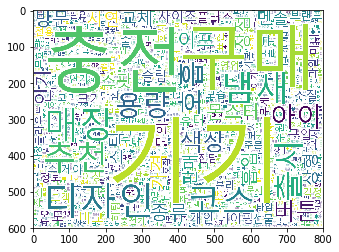

In [16]:
w1=WordCloud(font_path = 'C:\\windows\\Fonts\\malgun.ttf', width=800,height=600,mode='RGBA',background_color='white',max_words=2000).fit_words(dict(sort_result))

import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(w1)
plt.show()